# House Price Prediction – Regression Modeling

## Objective
The objective of this task is to build and evaluate regression models to predict house prices based on property features. The analysis focuses on data preparation, model comparison, and performance evaluation.


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [34]:
df = pd.read_csv(r"E:\SUMED_DATA\CODVEDA - INTERNSHIP\4) house Prediction Data Set.csv", delim_whitespace=True, header=None)
df.head()


C:\Users\ACER\AppData\Local\Temp\ipykernel_16024\666212442.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(r"E:\SUMED_DATA\CODVEDA - INTERNSHIP\4) house Prediction Data Set.csv", delim_whitespace=True, header=None)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [35]:
df.columns = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM',
    'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
    'B', 'LSTAT', 'Price'
]


## Dataset Overview
The dataset contains housing-related features used to predict property prices. The target variable represents the house price.


In [36]:
df.shape

(506, 14)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [38]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Initial Observations
- The dataset structure and data types were reviewed.
- Numerical feature ranges and potential anomalies were identified.


In [39]:
df.isnull().sum()


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [40]:
df.duplicated().sum()


np.int64(0)

In [41]:
df = df.drop_duplicates()


### Data Quality Checks
Missing values and duplicate records were examined to ensure data reliability before modeling.


In [42]:
X = df.drop('Price', axis=1)
y = df['Price']


### Feature and Target Separation
Independent variables were separated from the target variable for model training.


In [43]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


### Train-Test Split
The dataset was split into training and testing sets to evaluate model generalization.


In [44]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Feature Scaling
Standardization was applied to ensure features contribute equally to the linear regression model.


In [45]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)

mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

rmse_lr, r2_lr


(np.float64(4.928602182665336), 0.668759493535632)

### Linear Regression Results
Linear regression was used as a baseline model to understand linear relationships between features and house prices.


In [46]:
rf = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

rmse_rf, r2_rf


(np.float64(2.8109631609391226), 0.8922527442109116)

### Random Forest Results
Random Forest was applied to capture non-linear relationships and interactions between features.


In [47]:
comparison = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest"],
    "RMSE": [rmse_lr, rmse_rf],
    "R2 Score": [r2_lr, r2_rf]
})

comparison


,Model,RMSE,R2 Score
0,Linear Regression,4.928602,0.668759
1,Random Forest,2.810963,0.892253


### Model Comparison
Random Forest demonstrates improved performance over Linear Regression, indicating the presence of non-linear relationships in the data.


In [48]:
feature_importance = pd.Series(
    rf.feature_importances_, index=X.columns
).sort_values(ascending=False)

feature_importance


RM         0.503845
LSTAT      0.309509
DIS        0.060549
CRIM       0.038062
PTRATIO    0.016313
TAX        0.015661
NOX        0.015544
AGE        0.013840
B          0.012154
INDUS      0.007953
RAD        0.003811
ZN         0.001756
CHAS       0.001004
dtype: float64

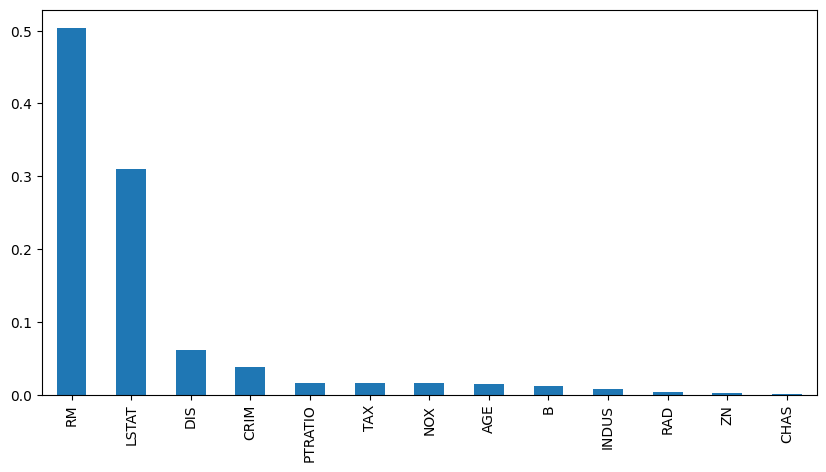

In [52]:
feature_importance.plot(kind='bar', figsize=(10, 5))
plt.show()


### Feature Importance Analysis
The most influential features contributing to house price prediction were identified using the Random Forest model.


## Final Summary
- A baseline linear regression model was built for comparison.
- A Random Forest model achieved better predictive performance.
- Feature importance analysis provided insights into key price drivers.

This regression pipeline demonstrates an end-to-end predictive modeling workflow.
